In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
my_pca = PCA(n_components=2)
my_pca.fit(X)
print(my_pca.explained_variance_ratio_)
print(my_pca.singular_values_)

[0.92461872 0.05306648]
[25.09996044  6.01314738]


In [2]:
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
# iris = datasets.load_iris()
X = iris.data
my_fa = FactorAnalysis(n_components=2)
# in new version of sklearn:
# my_fa = FactorAnalysis(n_components=2, rotation='varimax') 
X_transformed = my_fa.fit_transform(X)

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Loading Data

Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, and 6 Very Accurate. You can also download this dataset from the following the link: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [4]:
df= pd.read_csv("bfi.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [6]:
df

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [7]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

# Dropping missing values rows
df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null   floa

In [8]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

    Bartlett’s Test
    Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18184.306307820785, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.8483267027192372

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.
Choosing the Number of Factors

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [11]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(df)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [12]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

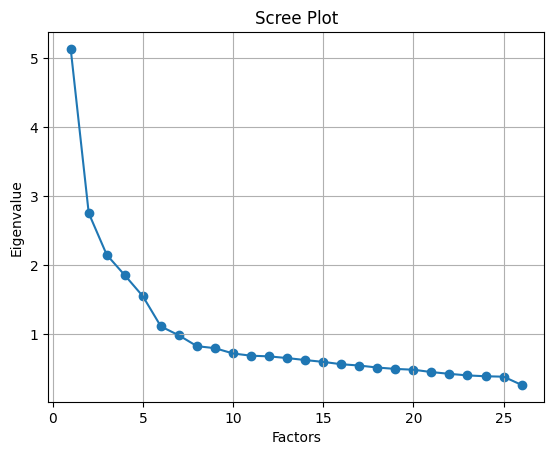

In [13]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [16]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [17]:
df1 = pd.DataFrame(fa.loadings_)
df1.index = df.columns
df1

,0,1,2,3,4,5
Unnamed: 0,-0.022903,-0.032472,0.033169,-0.038093,0.003795,0.103748
A1,0.099396,0.060474,0.026694,-0.530785,-0.120309,0.163638
A2,0.031767,0.259875,0.140226,0.646569,0.055770,-0.097050
A3,-0.005256,0.408849,0.109534,0.587004,0.016184,0.039149
A4,-0.079266,0.255342,0.229308,0.391760,-0.136293,0.033401
A5,-0.143645,0.491049,0.085649,0.451090,0.009111,0.105888
C1,0.005623,0.123647,0.540150,0.004221,0.183458,0.138798
C2,0.084358,0.106505,0.652496,0.056538,0.079203,0.208580
C3,-0.033946,0.049796,0.545877,0.100286,-0.012372,0.054480
C4,0.231617,0.008989,-0.672785,-0.089980,-0.153451,0.226977



    Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
    Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
    Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
    Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
    Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
    Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.


Let's perform factor analysis for 5 factors.

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(df)


df1 = pd.DataFrame(fa.loadings_)
df1.index = df.columns
df1

,0,1,2,3,4
Unnamed: 0,-0.019246,-0.061703,0.034865,-0.018678,0.014345
A1,0.106455,0.030705,0.027567,-0.429612,-0.074133
A2,0.028693,0.227127,0.141159,0.621801,0.064117
A3,0.005335,0.329927,0.115928,0.642856,0.061647
A4,-0.069443,0.209217,0.235418,0.431241,-0.108647
A5,-0.129002,0.397690,0.097901,0.528159,0.075363
C1,0.009548,0.048297,0.548276,0.041194,0.212169
C2,0.089975,0.014459,0.650304,0.105693,0.116582
C3,-0.030243,0.010825,0.555781,0.114165,-0.004812
C4,0.240794,-0.039326,-0.633576,-0.041462,-0.109695


In [19]:
# Get variance of each factors
df2 = pd.DataFrame(fa.get_factor_variance())
df2.index=['SS Loadings','Proportion Var','Cumulative Var']
df2

# Calculate the factor variance information,
# including variance, proportional variance
# and cumulative variance for each factor

,0,1,2,3,4
SS Loadings,2.736109,2.428049,2.082504,1.800505,1.549502
Proportion Var,0.105235,0.093387,0.080096,0.069250,0.059596
Cumulative Var,0.105235,0.198621,0.278718,0.347968,0.407564


Total 42% cumulative Variance explained by the 5 factors.
Pros and Cons of Factor Analysis

Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.
Conclusion

Congratulations, you have made it to the end of this tutorial!

In this tutorial, you have learned what factor analysis is. The different types of factor analysis, how does factor analysis work, basic factor analysis terminology, choosing the number of factors, comparison of principal component analysis and factor analysis, implementation in python using python FactorAnalyzer package, and pros and cons of factor analysis.

I look forward to hearing any feedback or questions. you can ask the question by leaving a comment and I will try my best to answer it.

In [20]:
fa.get_communalities()
# pd.DataFrame(fa.get_communalities(), index=df.columns )

array([0.00594781, 0.20309797, 0.46308345, 0.53938387, 0.30178879,
       0.46901562, 0.34974255, 0.45596212, 0.32298144, 0.47469872,
       0.43514823, 0.34925788, 0.54714941, 0.44058928, 0.53995056,
       0.40752683, 0.6816168 , 0.60936358, 0.54408627, 0.50590962,
       0.34926548, 0.31754663, 0.26762027, 0.47465419, 0.24567838,
       0.29560356])

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

The proportion of each variable’s variance that is explained by the factors can be inferred from the above. For example, we could consider the variable ‘talkatv’ about 62.9% of its variance is explained by all the factors together.

